# Analyzing the Stroop Effect 

## The libraries used for this analysis

In [1]:
import pandas as pd #used for data structures and analysis
import numpy as np #used for data structures and analysis
import scipy.stats as stats #used for statistical analysis
import matplotlib.pyplot as plt #used for visualisation
%matplotlib inline

### (1) What is the independent variable? What is the dependent variable?

There is one independent variable (explanatory variable) which indicates if the word condition is congruent or incongruent (this can be thought of as a binary variable). The dependent variable (response variable) is the metric in the hypothesis test, which is the response times between the two groups.
Explanatory variable = condition
Response variable = time

### (2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Because we are dealing with a sample of data and want to make inferences about the general population the hypothesis can be stated as below.

$\mu_{cc}$ - population average response time for the congruent condition

$\mu_{ic}$ - population average response time for the incongruent condition

$H_{0}: \mu_{cc} - \mu_{ic} = 0$ - before we collect any data we assume that the difference in the population average response time between the two groups are the same. In other words there is no significant difference in the population averages between the two groups.

$H_{1}: \mu_{cc} - \mu_{ic} \neq 0$ - after looking at the data is there a difference in the population average response time between the two groups

Because the two sets have the same sample size and each entry in the congruent group has a corresponding entry in the incongruent group, we can say that the two groups are related to each other. In this instance the paired t test for two related groups can be used for the statistical analysis. The z test would also have worked, but because the sample size is limited (24 observations) and we do not know the population standard deviation the t test is still the better choice.

### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
#Read in the data from a csv file and store the content in a dataframe name 'sd':
sd = pd.read_csv('stroopdata.csv')

In [3]:
#Take a look at the data:
#No data missing:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
sd.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
#No duplicate data:
sum(sd.duplicated())

0

In this data set we have two variables that is of type numerical (quantitive continuous)

#### (A) Centeredness
>- Mean
>- Median

In [7]:
#Mean for the Congruent variable:
mean_c = np.mean(sd['Congruent'])
mean_c

14.051124999999999

In [8]:
#Mean for the Incongruent variable:
mean_i = np.mean(sd['Incongruent'])
mean_i

22.015916666666666

In [9]:
#Median for the Congruent variable:
median_c = np.median(sd['Congruent'])
median_c

14.3565

In [10]:
#Median for the Incongruent variable:
median_i = np.median(sd['Incongruent'])
median_i

21.0175

#### (B) Spread
>- Max
>- Min
>- Range
>- Standard Deviation

In [11]:
#Max for the Congruent variable:
max_c = np.max(sd['Congruent'])
max_c

22.328000000000003

In [12]:
#Min for the Congruent variable:
min_c = np.min(sd['Congruent'])
min_c

8.63

In [13]:
#Range for the Congruent variable:
range_c = max_c - min_c
range_c

13.698000000000002

In [14]:
#Max for the Incongruent variable:
max_i = np.max(sd['Incongruent'])
max_i

35.255

In [15]:
#Min for the Incongruent variable:
min_i = np.min(sd['Incongruent'])
min_i

15.687000000000001

In [16]:
#Range for the Incongruent variable:
range_i = max_i - min_i
range_i

19.568

In [19]:
#Std deviation for the Congruent variable:
#During term1 this extra parameter 'ddof' was never mentioned, I'll remember it going forward, thank you
std_c = np.std(sd['Congruent'],ddof=1)
std_c

3.5593579576451955

In [20]:
#Std deviation the Incongruent variable:
#During term1 this extra parameter 'ddof' was never mentioned, I'll remember it going forward, thank you
std_i = np.std(sd['Incongruent'],ddof=1)
std_i

4.797057122469138

### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

#### (C) Shape
>- Histogram
>- Boxplot

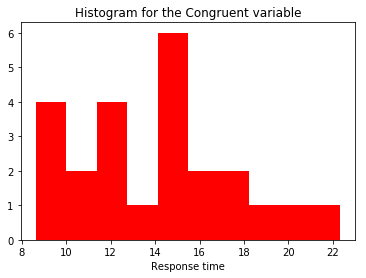

In [21]:
#Histogram for the Congruent variable:
plt.hist(sd['Congruent'], color = 'r')
plt.title('Histogram for the Congruent variable')
plt.xlabel('Response time');

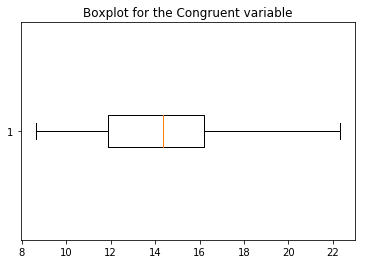

In [22]:
#Boxplot for the Congruent variable:
plt.boxplot(sd['Congruent'],vert=False)
plt.title('Boxplot for the Congruent variable');

The histogram for the congruent variable set seems to be left skewed since median_c > mean_c

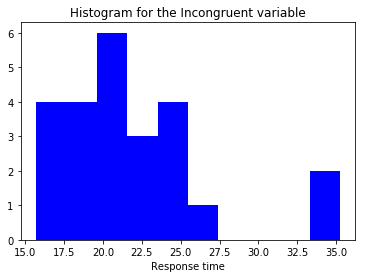

In [23]:
#Histogram for the Incongruent variable:
plt.hist(sd['Incongruent'], color = 'b')
plt.title('Histogram for the Incongruent variable')
plt.xlabel('Response time');

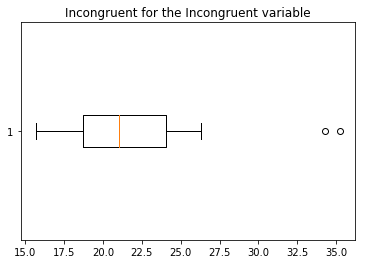

In [24]:
#Boxplot for the Incongruent variable:
plt.boxplot(sd['Incongruent'],vert=False)
plt.title('Incongruent for the Incongruent variable');

The histogram for the incongruent variable set seems to be right skewed since median_i < mean_i.
This set also clearly has two data points that are outliers

### (5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [25]:
model = stats.ttest_rel(sd['Congruent'], sd['Incongruent'], axis=0, nan_policy='propagate')

In [26]:
statistic = model[0]
pvalue = model[1]

In [27]:
statistic

-8.020706944109957

In [28]:
pvalue

4.103000585711178e-08

Working with a confidence level of 95% and significance level of 5% the results of this statistical test has a pvalue that is much lower than the significance level. There is therefore enough statistical evidence to reject the null hypothesis. We can therefore say that the population average response times between the two tests are significantly different. During the investigation of the dataset, when I applied the discriptive statistics I observed big differences which is why I expected this result to be statistical significant.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The reason why I think the response times go up during the incongruent test is because our minds are programmed to read the word (text) and not the color of the word. This creates a confused situation for the brain which leads to the delayed response time. This is known as interference. Alternative tests was developed for number-colour and picture-colour scenarios, which had a similar effect to that of the original word-colour test.

### References

[resource1](https://d2l.deakin.edu.au/d2l/eP/presentations/presentation_preview_popup.d2l?presId=67655)

[resource2](https://imotions.com/blog/the-stroop-effect/)